In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture

In [ ]:
df = pd.read_csv("bank_transactions.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [7]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [8]:
df = df.dropna()
df['CustomerDOB'].value_counts()

CustomerDOB
1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: count, Length: 17233, dtype: int64

In [9]:
df = df.loc[~(df['CustomerDOB'] == '1/1/1800')]
df['CustomerDOB'].value_counts()

CustomerDOB
1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
23/2/05       1
28/11/42      1
23/9/49       1
14/3/40       1
24/10/44      1
Name: count, Length: 17232, dtype: int64

In [10]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format = '%d/%m/%y')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [12]:
df.loc[df['CustomerDOB'].dt.year >= 2021, ['CustomerDOB']] -= pd.DateOffset(years = 100)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [13]:
df['TransactionDate'].value_counts()


TransactionDate
7/8/16      26022
13/8/16     25478
4/9/16      25392
6/8/16      25267
3/9/16      25102
10/9/16     24424
11/9/16     24308
14/8/16     24262
15/8/16     23001
21/8/16     21655
2/9/16      21541
12/8/16     21115
1/9/16      21019
9/8/16      20489
11/8/16     20461
8/9/16      20447
10/8/16     20352
9/9/16      20308
27/8/16     20130
20/8/16     20031
5/9/16      20024
7/9/16      19904
5/8/16      19890
28/8/16     19874
17/8/16     19763
8/8/16      19647
2/8/16      19631
4/8/16      19428
13/9/16     19391
12/9/16     19385
3/8/16      19274
1/8/16      19213
16/8/16     19065
14/9/16     18573
15/9/16     18482
6/9/16      18440
31/8/16     18368
18/8/16     18302
19/8/16     17394
22/8/16     17339
25/8/16     17335
24/8/16     16647
26/8/16     16463
30/8/16     16119
23/8/16     16056
29/8/16     15534
18/9/16     13902
26/9/16     11541
25/9/16      7766
27/9/16      6910
22/9/16      6350
21/10/16     3408
23/9/16      3276
30/9/16      1822
16/10/16    

In [14]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = '%d/%m/%y')


Text(0.5, 1.0, 'Number of transactions in each month')

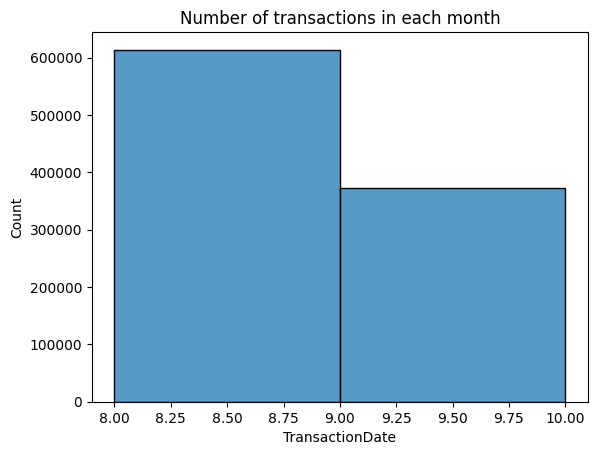

In [15]:
sns.histplot(x = df['TransactionDate'].dt.month, bins = 3, binwidth = 1)
plt.title('Number of transactions in each month')

In [16]:
df['Age'] = (pd.to_datetime('today') - df['CustomerDOB'])/np.timedelta64(1, 'Y')
df['DaysSinceTransaction'] = (pd.to_datetime('today') - df['TransactionDate'])/np.timedelta64(1, 'D')
df['DaysSinceTransaction'] = df['DaysSinceTransaction'] - df['DaysSinceTransaction'].min()
temp = df[['CustomerID', 'TransactionID']].groupby(by = 'CustomerID', as_index = False, sort = False).count().reset_index()

In [17]:
temp = temp.drop(columns = 'index')
temp.rename(columns = {'TransactionID' : 'TransactionFrequency'})
df = df.merge(right = temp, on = 'CustomerID')
df.head()

,TransactionID_x,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceTransaction,TransactionID_y
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,31.293763,80.0,1
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,68.088284,80.0,1
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,28.414311,80.0,1
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,51.630749,80.0,2
4,T391139,C5342380,1979-05-29,M,MUMBAI,3195.78,2016-08-13,194148,878.4,45.923900,69.0,2


In [18]:
df = df.rename(columns = {'TransactionID_y' : 'TransactionFrequency',
                         'DaysSinceTransaction' : 'Recency'})

In [19]:
rmf = df.drop(columns = ['CustGender', 'CustLocation', 'CustLocation',
                         'CustAccountBalance', 'TransactionTime', 'Age']
             ).groupby(by = 'CustomerID').agg({'Recency' : 'min',
                                               'TransactionFrequency': 'first',
                                               'TransactionAmount (INR)' : 'mean'})
df = df.rename(columns = {'TransactionAmount (INR)' : 'AverageTransactionAmount'})
rmf = rmf.rename(columns = {'TransactionAmount (INR)' : 'AverageTransactionAmount'})
rmf.head()

,Recency,TransactionFrequency,AverageTransactionAmount
CustomerID,,,
C1010011,25.0,2,2553.0
C1010012,68.0,1,1499.0
C1010014,75.0,2,727.5
C1010018,36.0,1,30.0
C1010024,64.0,1,5000.0


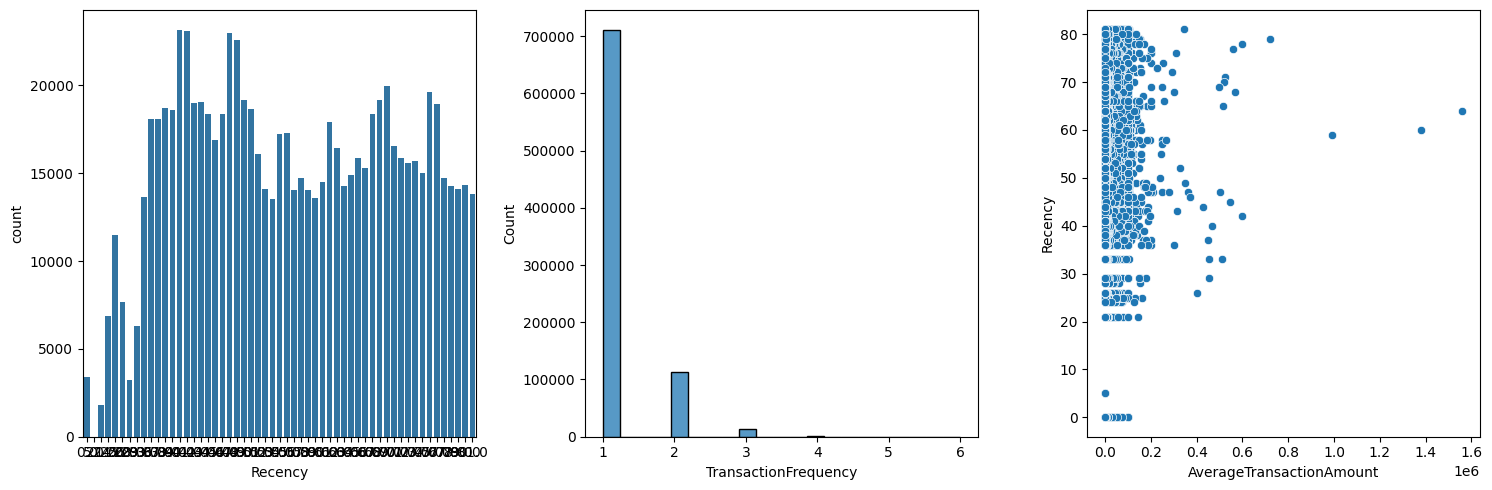

In [20]:

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
axes = axes.flatten()

sns.countplot(x = 'Recency', data = rmf, ax = axes[0])
sns.histplot(x = 'TransactionFrequency', data = rmf, ax = axes[1])
sns.scatterplot(x = 'AverageTransactionAmount', y = 'Recency', data = rmf, ax = axes[2])
plt.tight_layout()

In [21]:
def recency_score(value, quartiles):
    if value < quartiles[0.25]:
        return 4
    if value < quartiles[0.5]:
        return 3
    if value < quartiles[.75]:
        return 2
    else:
        return 1

def monetary_score(value, quartiles):
    if value < quartiles[0.25]:
        return 1
    if value < quartiles[0.5]:
        return 2
    if value < quartiles[0.75]:
        return 3
    else:
        return 4
    
quartiles = rmf.quantile([0.25, 0.5, 0.75]).to_dict()

rmf['recency_score'] = rmf['Recency'].apply(recency_score, quartiles = quartiles['Recency'],)
rmf['frequency_score'] = rmf['TransactionFrequency'].astype(int)
rmf.loc[rmf['frequency_score'] > 4, 'frequency_score'] = 4
rmf['monetary_score'] = rmf['AverageTransactionAmount'].apply(monetary_score, quartiles = quartiles['AverageTransactionAmount'],)
rmf['total_score'] = rmf['recency_score'] + rmf['frequency_score'] + rmf['monetary_score']

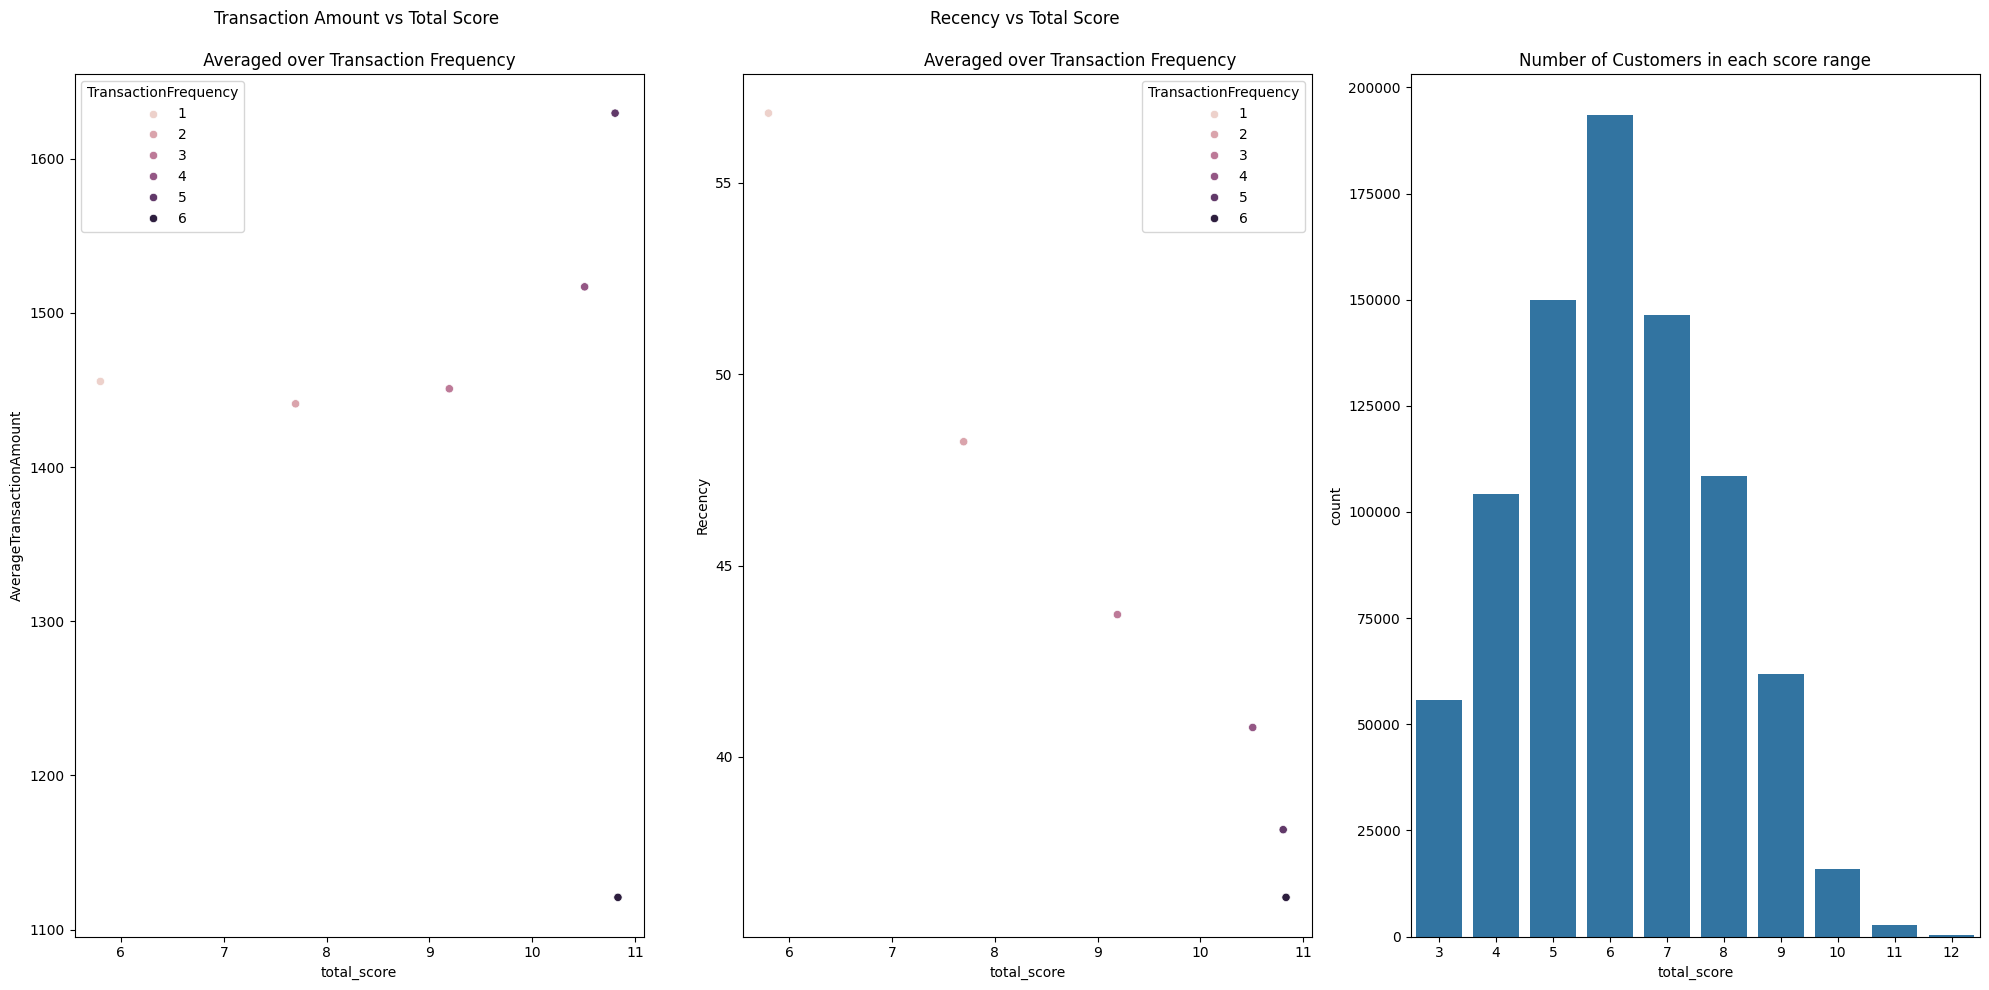

In [22]:
fig, axes = plt.subplots(1, 3, figsize = (20, 10))
axes = axes.flatten()

recency = rmf.groupby(by = 'TransactionFrequency').mean().reset_index()
avg_amount = rmf.groupby(by = 'TransactionFrequency').mean().reset_index()


sns.scatterplot(x = 'total_score', y = 'AverageTransactionAmount', hue = 'TransactionFrequency',
            data = avg_amount, ax = axes[0])
axes[0].set_title('''Transaction Amount vs Total Score 
                  \n Averaged over Transaction Frequency ''')
sns.scatterplot(x = 'total_score', y = 'Recency', data = recency, hue = 'TransactionFrequency',
            ax = axes[1])
axes[1].set_title('''Recency vs Total Score \n
                    Averaged over Transaction Frequency''')
sns.countplot(x = 'total_score', data = rmf, ax = axes[2])
axes[2].set_title('Number of Customers in each score range')
plt.tight_layout()

In [23]:
rmf[rmf.total_score == 12].count()


Recency                     273
TransactionFrequency        273
AverageTransactionAmount    273
recency_score               273
frequency_score             273
monetary_score              273
total_score                 273
dtype: int64

In [24]:
df_cluster = df.drop(columns = ['CustomerID', 'CustomerDOB', 'TransactionDate', 'TransactionTime'])
df_cluster['CustGender'] = df_cluster['CustGender'].map(lambda x: 1 if x == 'F' else 0)
locations = df_cluster.CustLocation.unique()
locations = {place : idx for idx, place in enumerate(locations)}
df_cluster['CustLocation'] = df_cluster['CustLocation'].map(locations)
df_cluster.head()

,TransactionID_x,CustGender,CustLocation,CustAccountBalance,AverageTransactionAmount,Age,Recency,TransactionFrequency
0,T1,1,0,17819.05,25.0,31.293763,80.0,1
1,T2,0,1,2270.69,27999.0,68.088284,80.0,1
2,T3,1,2,17874.44,459.0,28.414311,80.0,1
3,T4,1,2,866503.21,2060.0,51.630749,80.0,2
4,T391139,0,2,3195.78,878.4,45.923900,69.0,2


In [25]:
numeric_to_locations = {idx : location for idx, location in enumerate(locations.keys())}
df_cluster['CustLocation'].value_counts().head(10)

CustLocation
2     97679
22    77751
14    76380
8     70518
18    67335
35    31675
19    27500
7     24493
45    21819
13    21006
Name: count, dtype: int64

In [26]:
location_9 = df_cluster.loc[df_cluster.CustLocation == 9]
location_9.head()

,TransactionID_x,CustGender,CustLocation,CustAccountBalance,AverageTransactionAmount,Age,Recency,TransactionFrequency
14,T11,0,9,48429.49,259.0,42.773215,80.0,2
43,T793207,0,9,6786.39,16.0,33.091023,46.0,2
352,T289,0,9,390.04,567.0,38.597873,0.0,1
384,T317,0,9,5802.91,695.0,55.017051,0.0,1
390,T322,0,9,176012.36,222.0,39.915681,0.0,1


In [27]:
ss = StandardScaler()
ct = ColumnTransformer([('Standard Scaling', ss, 
                    ['CustAccountBalance', 'AverageTransactionAmount',
                    'Age', 'Recency'])], remainder = 'passthrough')

clusters = range(2, 10)
X = location_9.drop(columns = ['TransactionID_x', 'CustLocation'])
X = ct.fit_transform(X)

In [28]:
def plt_silhouette(clusters, clusterer):
    for cluster in clusters:
        fig, ax = plt.subplots(1, 1, figsize = (10, 10))

        ax.set_xlim([0, 1])
        ax.set_ylim([0, len(X) + (cluster + 1) * 10])
        
        if clusterer == MiniBatchKMeans:
            md = MiniBatchKMeans(n_clusters = cluster)
            preds = md.fit_predict(X)
            md_name = 'MiniBatchKMeans'
        else:
            md = GaussianMixture(n_components = cluster)
            preds = md.fit_predict(X)
            md_name = 'GaussianMixture'
        
        sil_average = silhouette_score(X, preds)
        print(f'For {cluster} clusters,\n the average silhouette score is {sil_average}')
        sample_sil = silhouette_samples(X, preds)
        y_lower = 10

        for i in range(cluster):
            cluster_sil = sample_sil[preds == i]
            cluster_sil.sort()
            size_cluster = cluster_sil.shape[0]
            y_upper = y_lower + size_cluster
            color = cm.nipy_spectral(float(i) / cluster)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                            0,
                            cluster_sil,
                            facecolor = color,
                            edgecolor = color)
            ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
            y_lower = y_upper + 10
            ax.axvline(x = sil_average, color = 'red', linestyle = '--')
            ax.set_yticks([])
            ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            ax.set_title(f'Silhouette analysis using {md_name} for {cluster} clusters', fontweight = 'bold')

c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 2 clusters,
 the average silhouette score is 0.22775164915568008


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 3 clusters,
 the average silhouette score is 0.26727638375804486


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 4 clusters,
 the average silhouette score is 0.25351391592778383


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 5 clusters,
 the average silhouette score is 0.18494507700395393


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 6 clusters,
 the average silhouette score is 0.1753651877839671


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 7 clusters,
 the average silhouette score is 0.20203208804509695


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 8 clusters,
 the average silhouette score is 0.18780294628947505


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 9 clusters,
 the average silhouette score is 0.2204055382770794


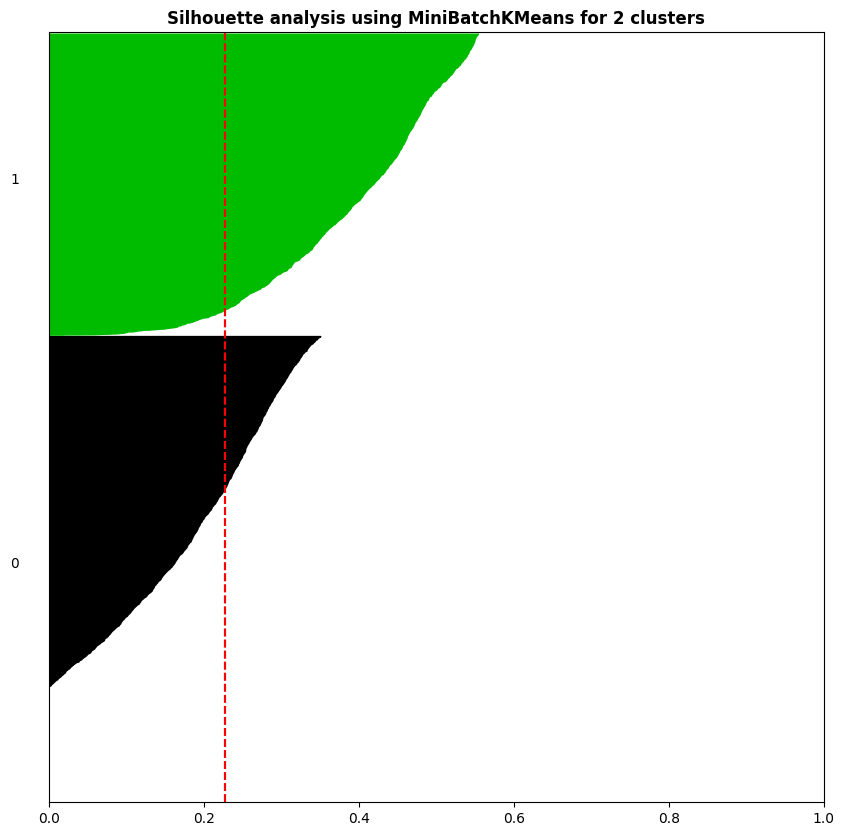

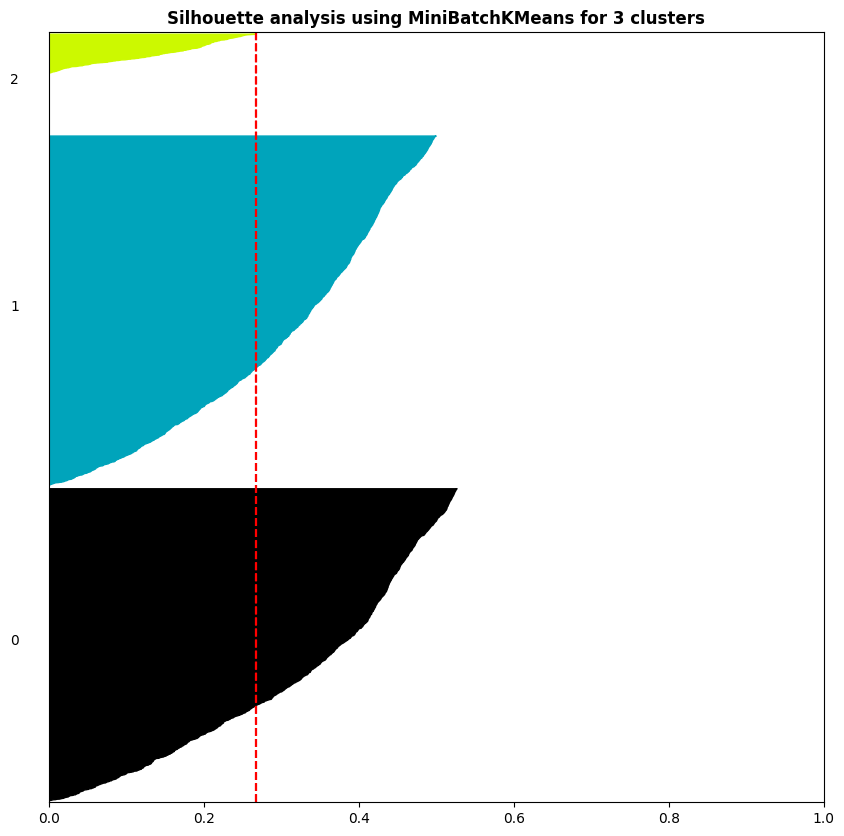

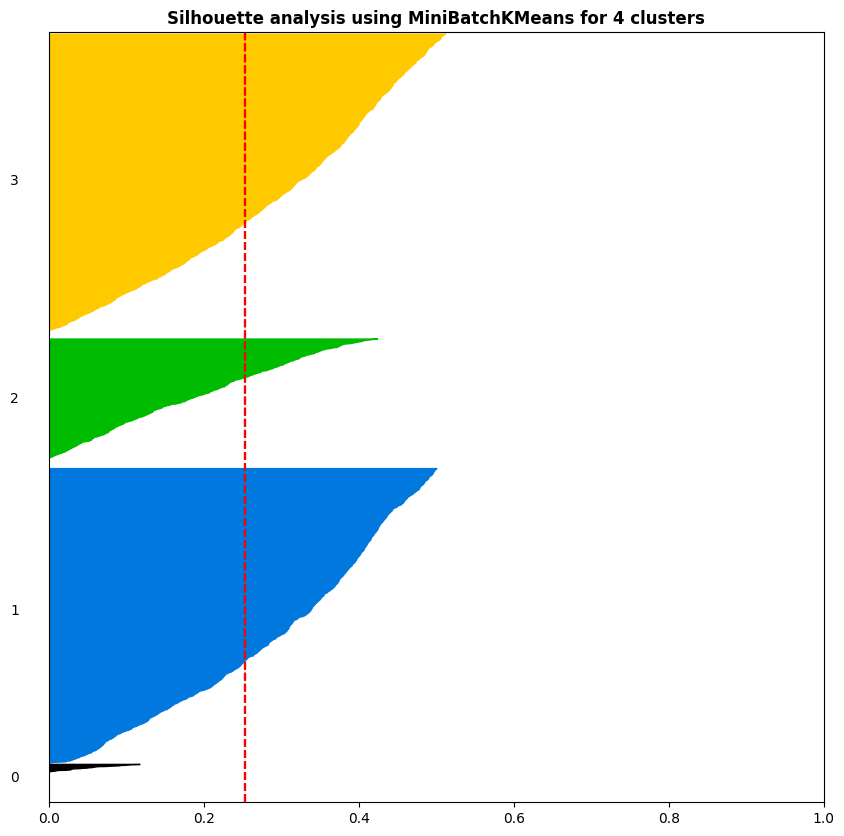

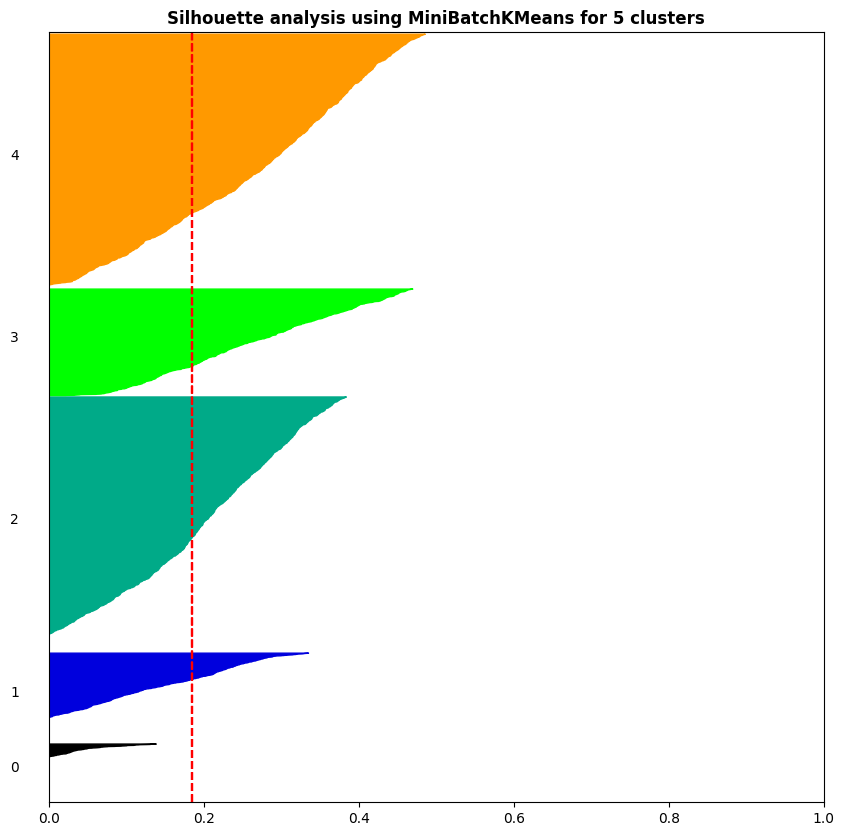

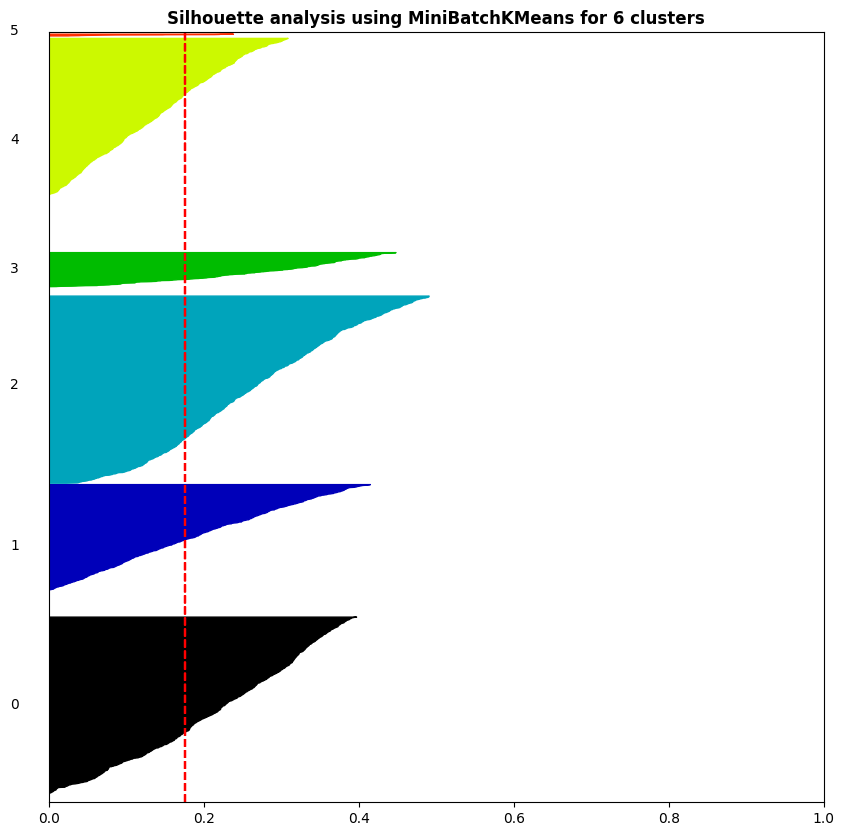

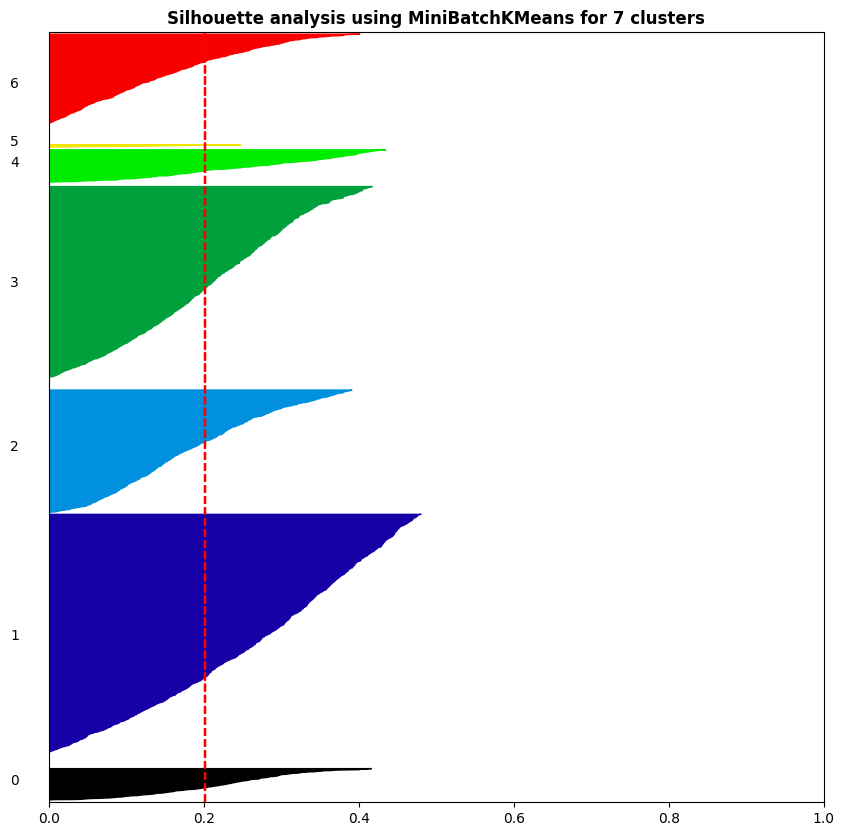

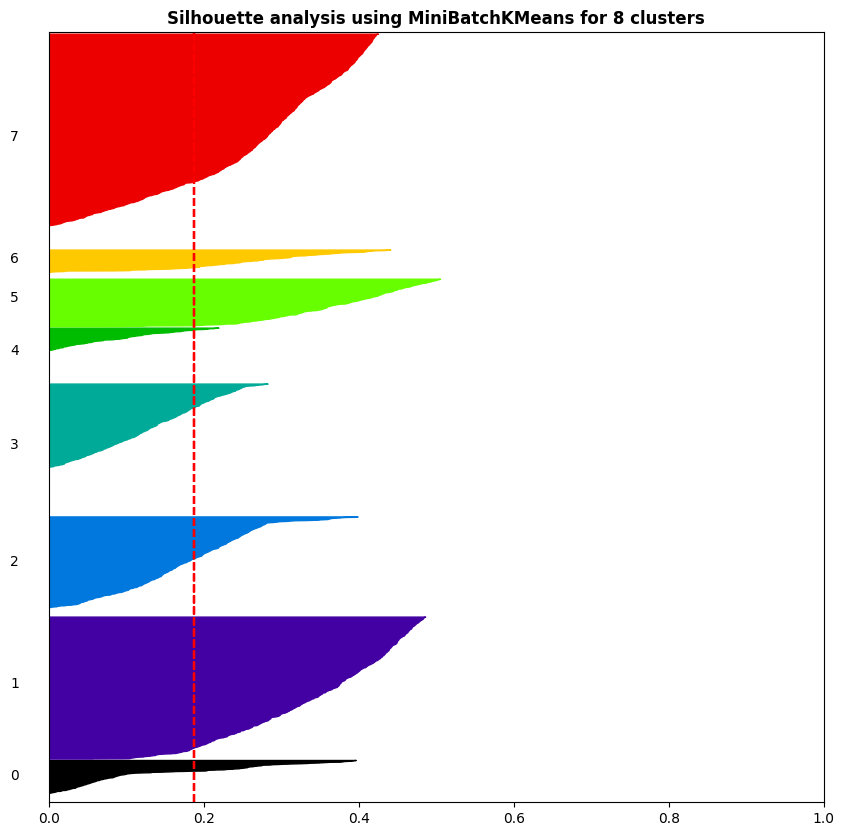

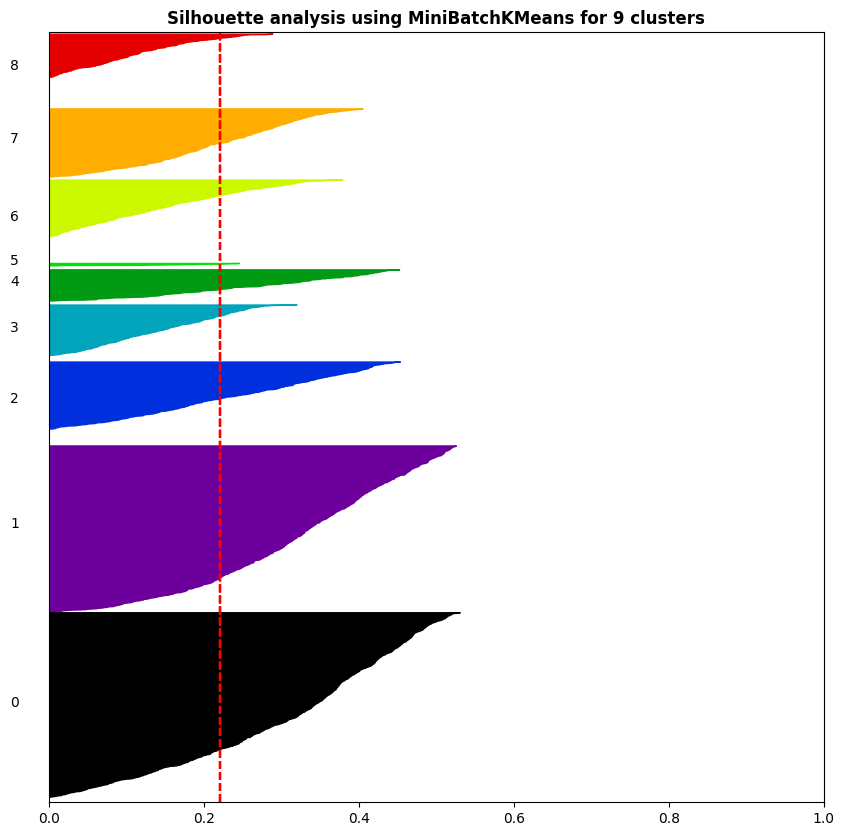

In [29]:
plt_silhouette(clusters, MiniBatchKMeans)


For 2 clusters,
 the average silhouette score is 0.27055678344156364
For 3 clusters,
 the average silhouette score is 0.22607380998990598
For 4 clusters,
 the average silhouette score is 0.01357652226368405
For 5 clusters,
 the average silhouette score is 0.10431872120881931
For 6 clusters,
 the average silhouette score is 0.10555496607698242
For 7 clusters,
 the average silhouette score is -0.005424867250215934
For 8 clusters,
 the average silhouette score is 0.0983875117745826
For 9 clusters,
 the average silhouette score is 0.06803129667284442


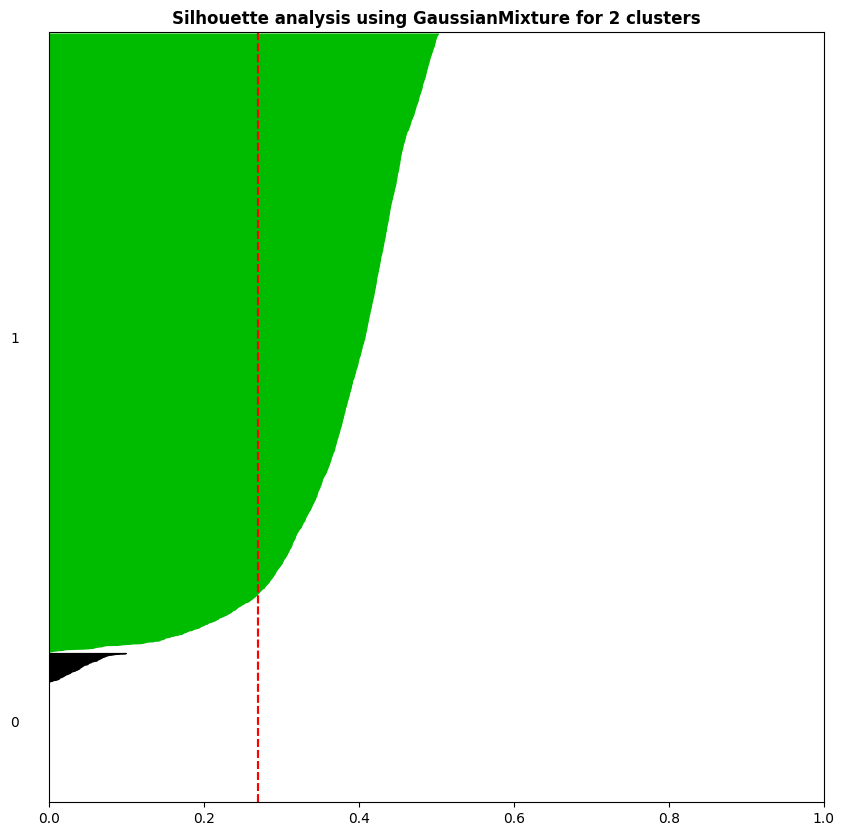

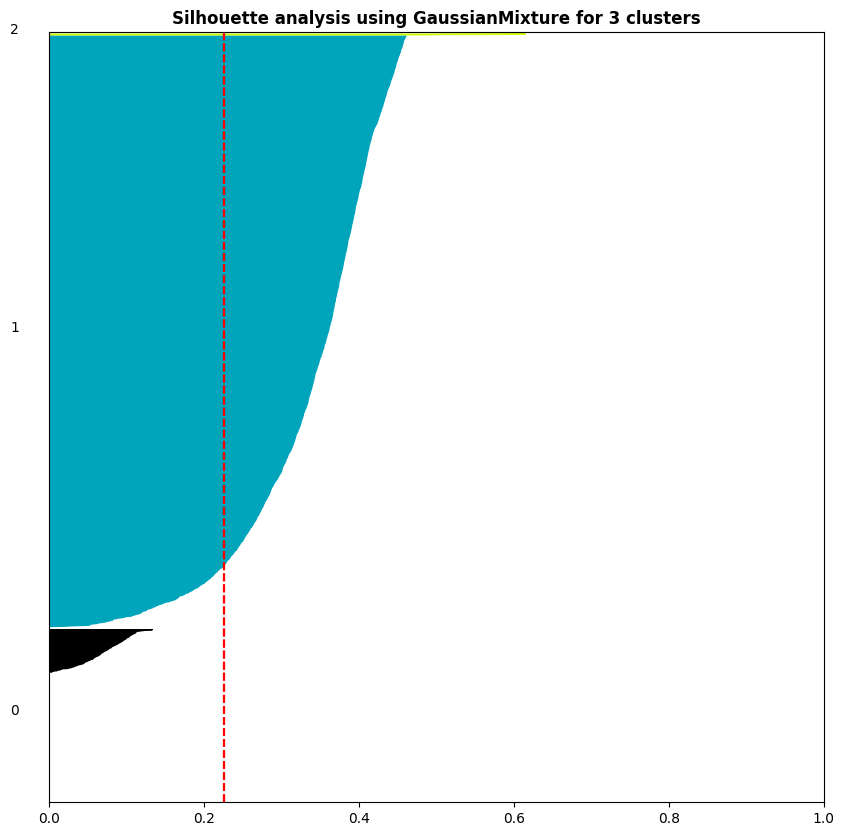

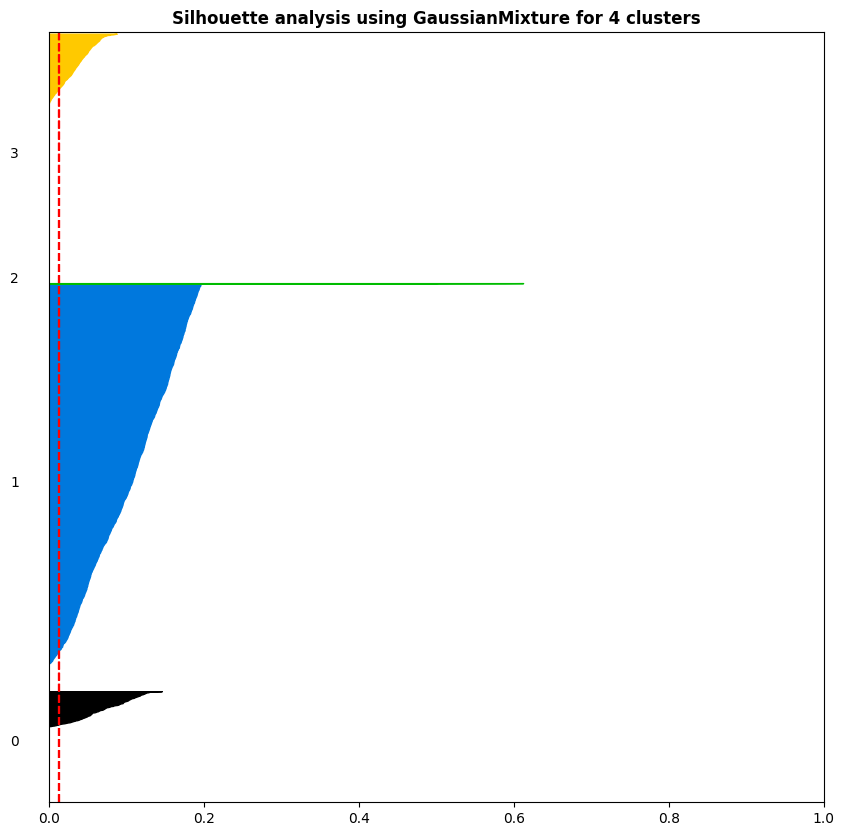

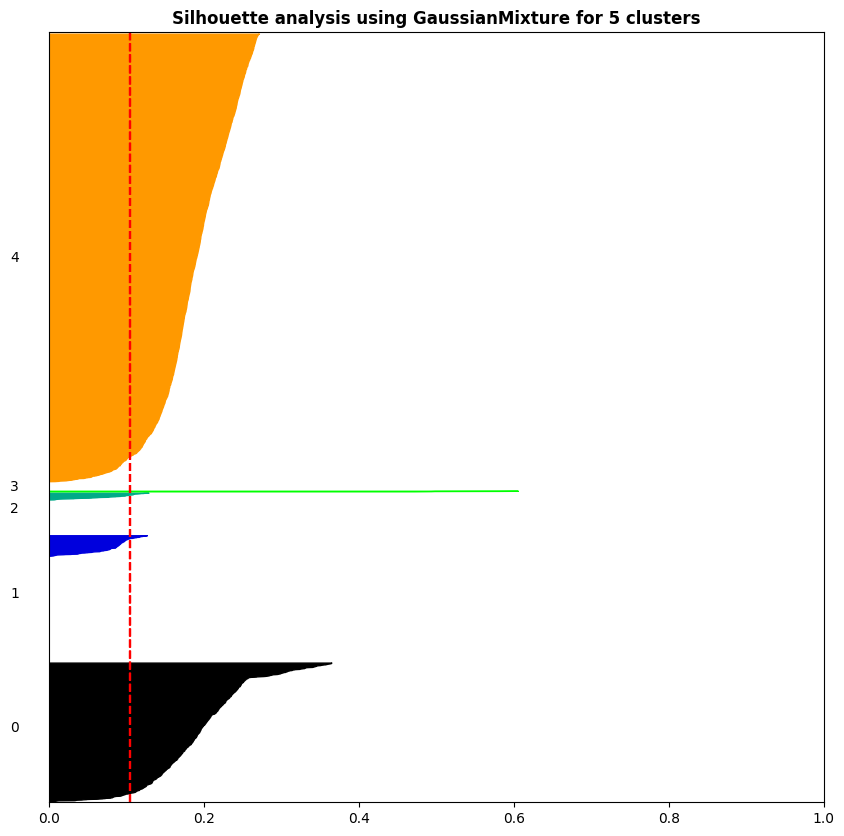

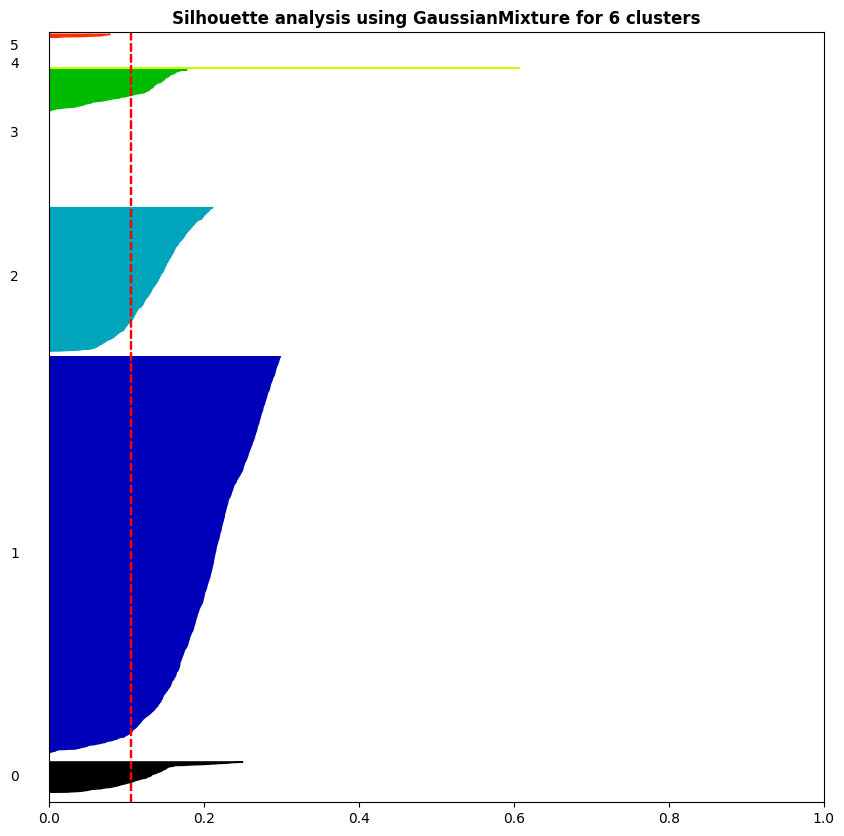

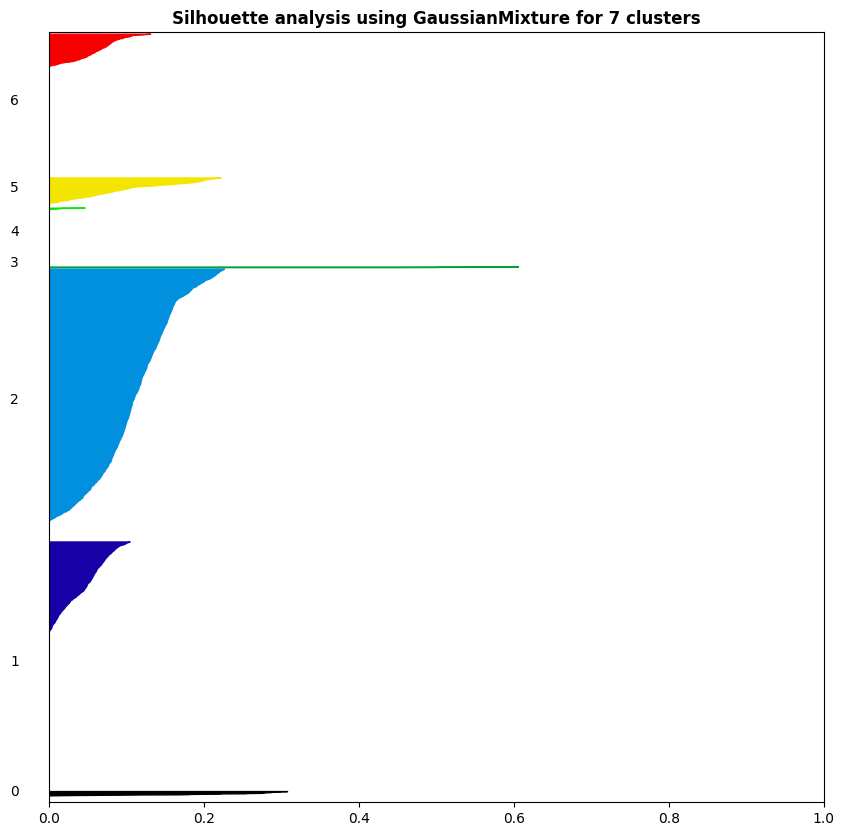

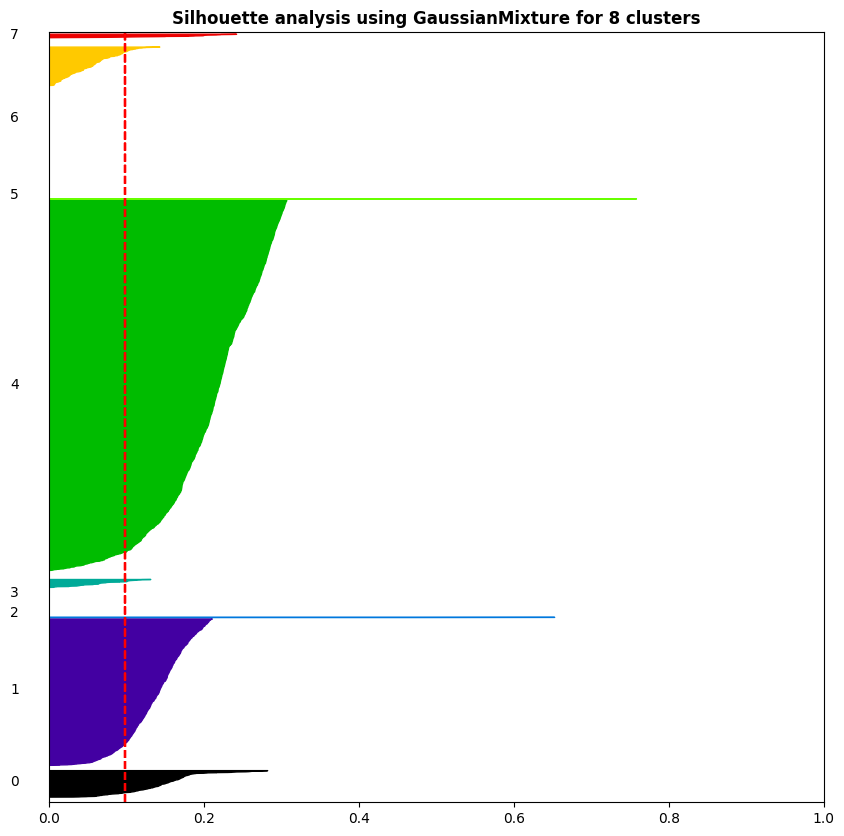

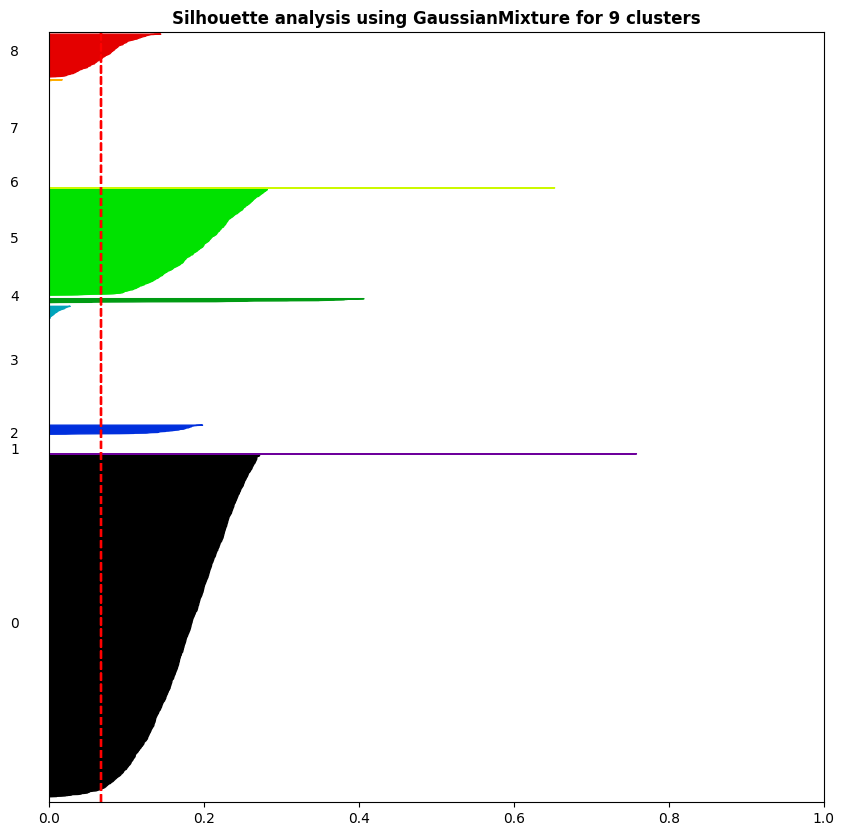

In [30]:
plt_silhouette(clusters, GaussianMixture)


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 2 clusters,
 the average silhouette score is 0.38406150867711925


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 3 clusters,
 the average silhouette score is 0.20695233335868818


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 4 clusters,
 the average silhouette score is 0.3128468744059619


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 5 clusters,
 the average silhouette score is 0.20863064733931455


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 6 clusters,
 the average silhouette score is 0.2928136547226395


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 7 clusters,
 the average silhouette score is 0.21814906747011947


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 8 clusters,
 the average silhouette score is 0.24749454518100583


c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For 9 clusters,
 the average silhouette score is 0.22309790933172213


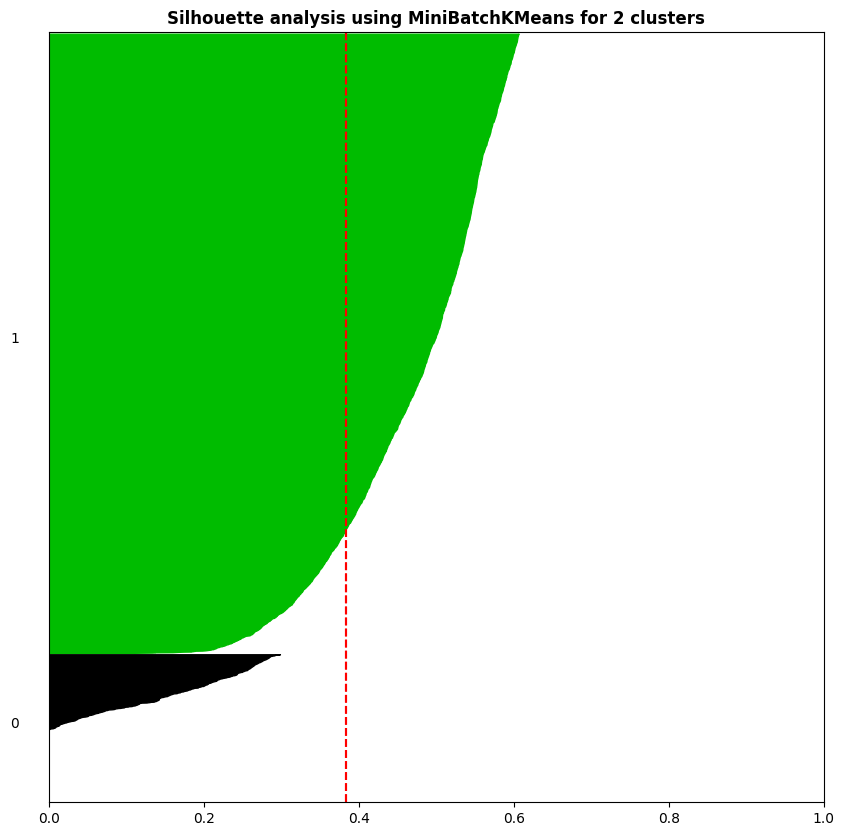

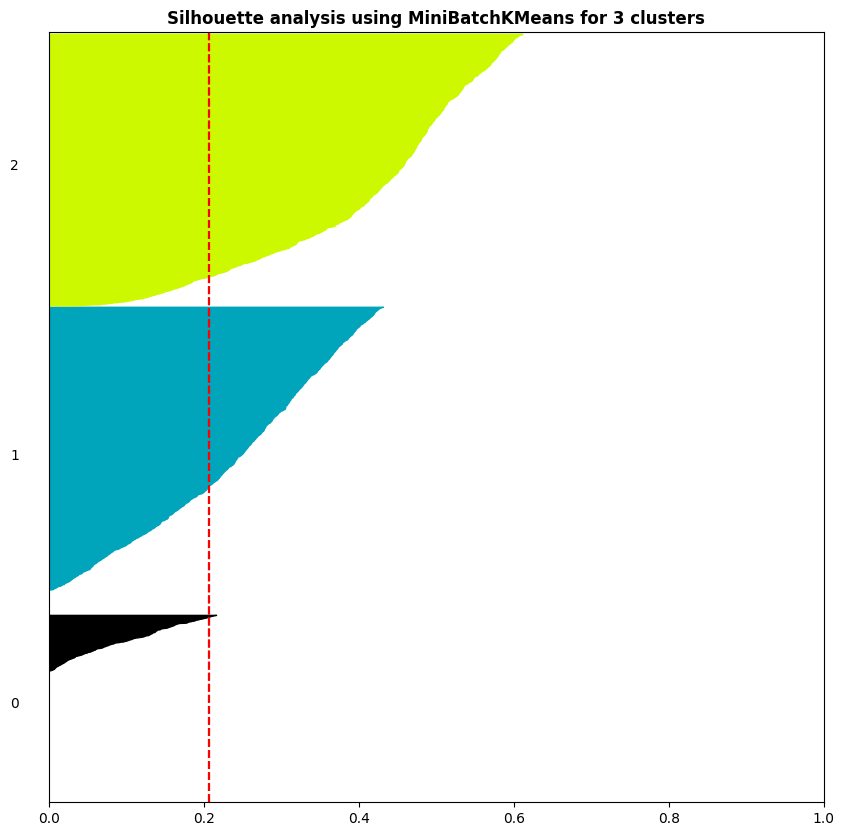

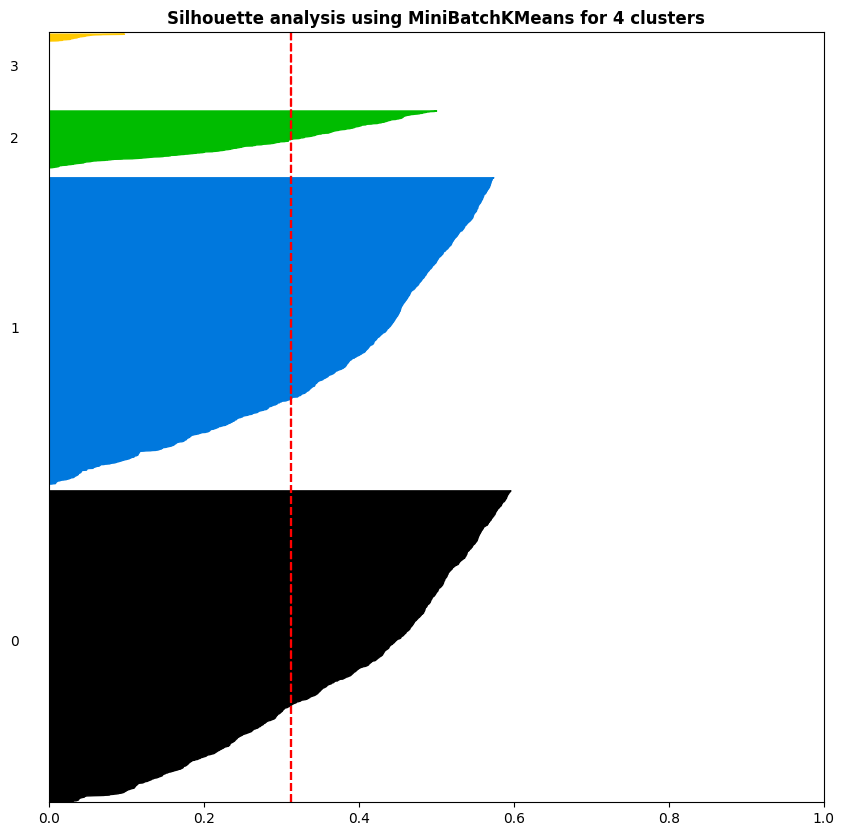

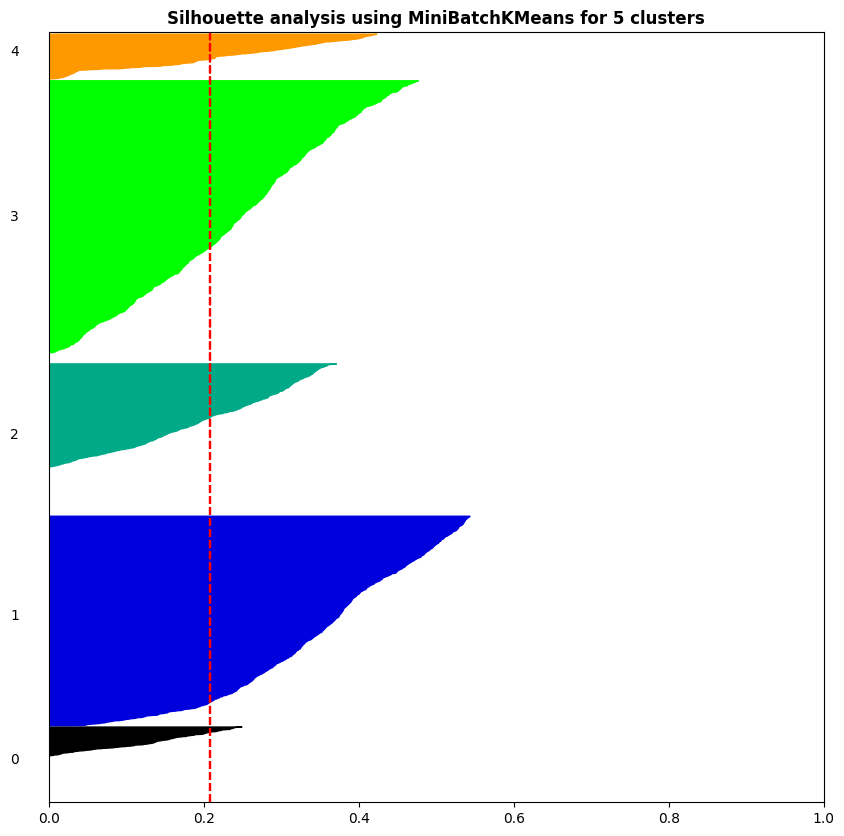

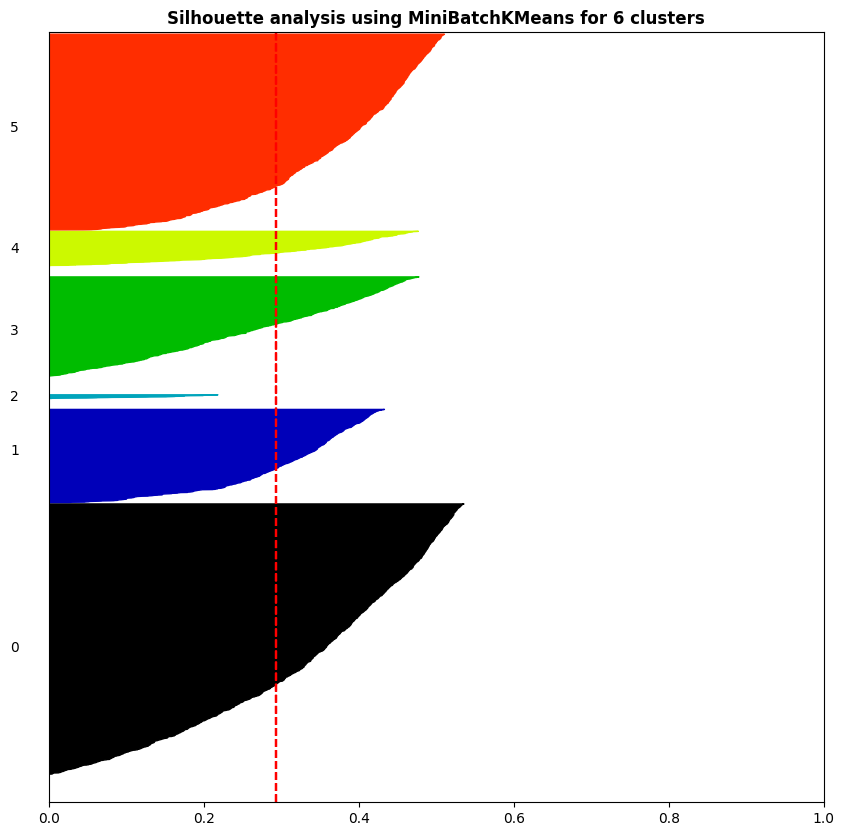

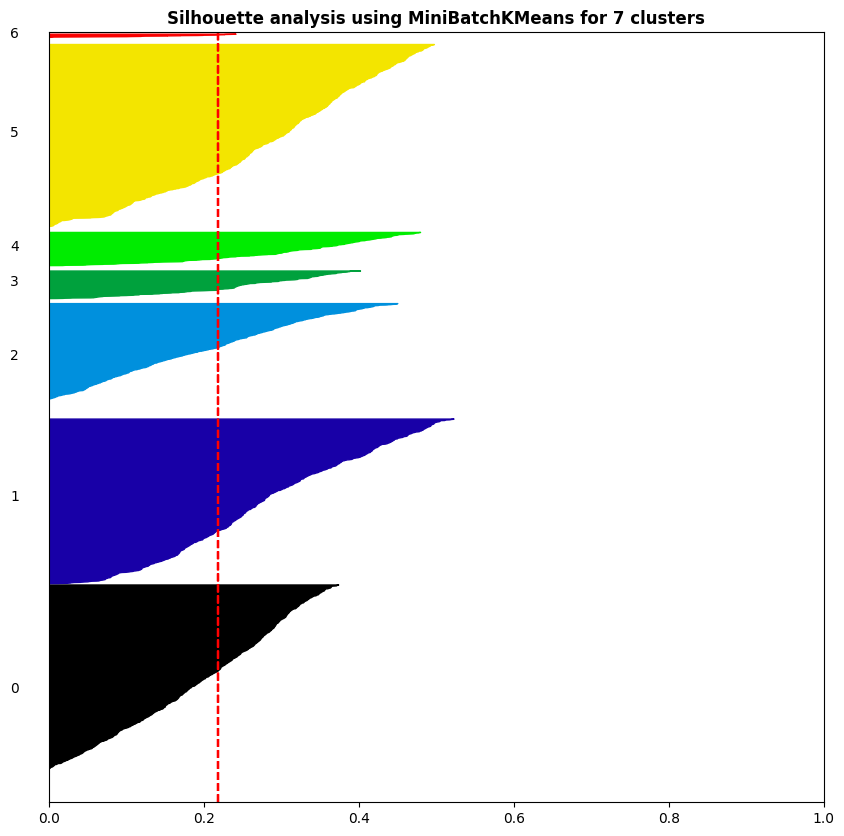

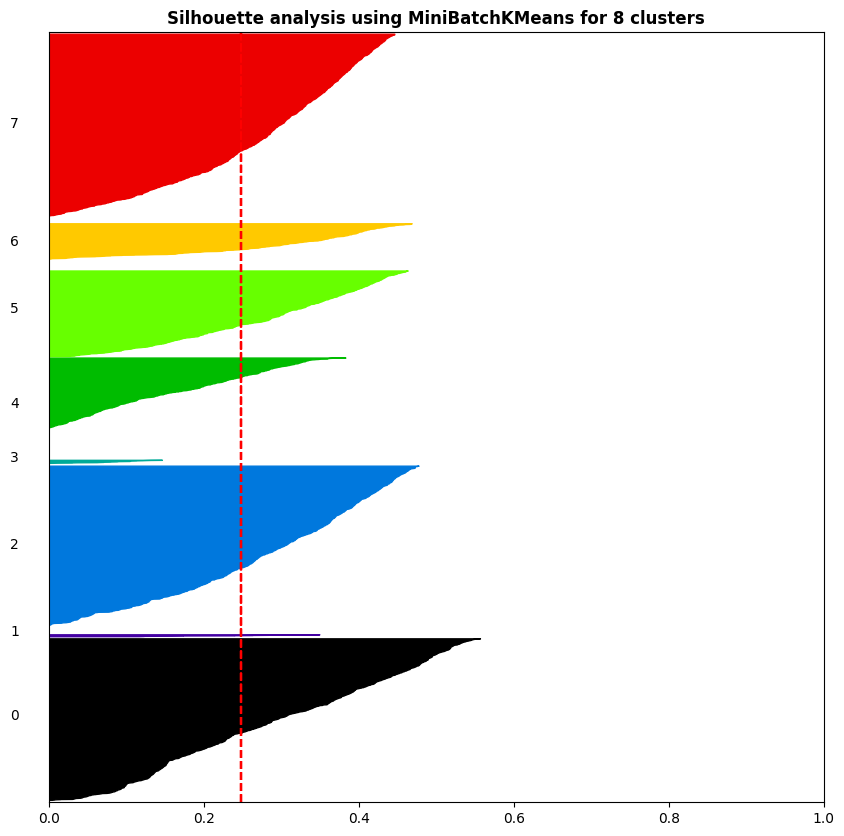

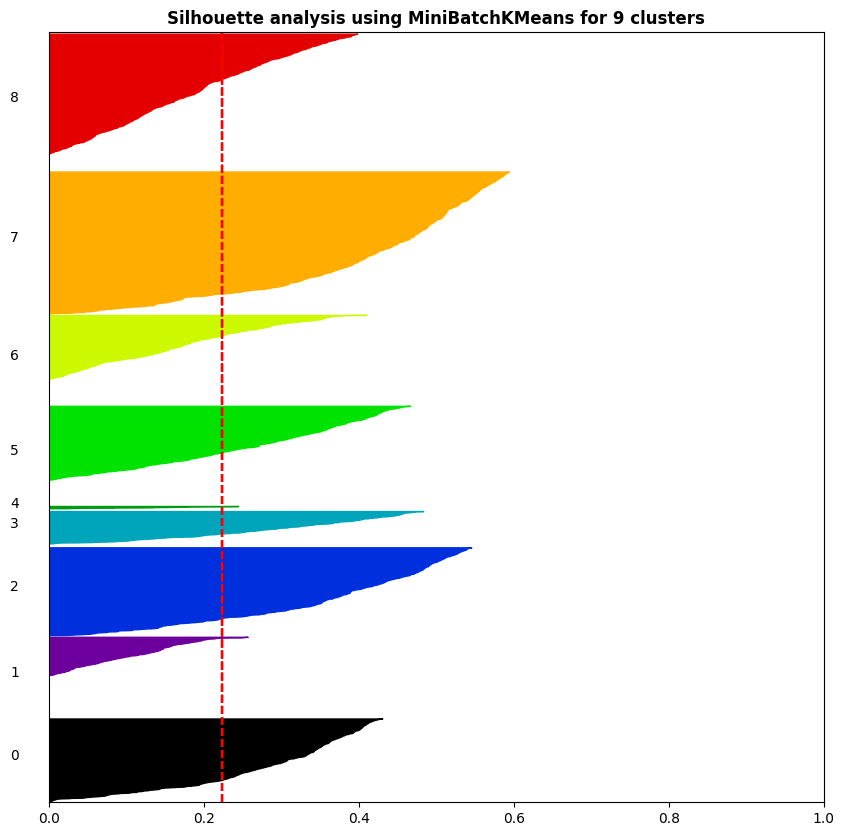

In [31]:
X = location_9.drop(columns = ['TransactionID_x', 'CustLocation', 'TransactionFrequency'])
X = ct.fit_transform(X)
plt_silhouette(clusters, MiniBatchKMeans)

In [32]:
km3 = MiniBatchKMeans(n_clusters = 3)
km4 = MiniBatchKMeans(n_clusters = 4)

location_9['Three_Clusters'] = km3.fit_predict(X)
location_9['Four_Clusters'] = km4.fit_predict(X)

location_9.head()

c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19800\834285718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_9['Three_Clusters'] = km3.fit_predict(X)
c:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\LENOVO\AppData

,TransactionID_x,CustGender,CustLocation,CustAccountBalance,AverageTransactionAmount,Age,Recency,TransactionFrequency,Three_Clusters,Four_Clusters
14,T11,0,9,48429.49,259.0,42.773215,80.0,2,0,3
43,T793207,0,9,6786.39,16.0,33.091023,46.0,2,2,2
352,T289,0,9,390.04,567.0,38.597873,0.0,1,2,1
384,T317,0,9,5802.91,695.0,55.017051,0.0,1,2,1
390,T322,0,9,176012.36,222.0,39.915681,0.0,1,2,1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19800\464498403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_9['TransactionFrequency'] = location_9['TransactionFrequency'].astype(int)


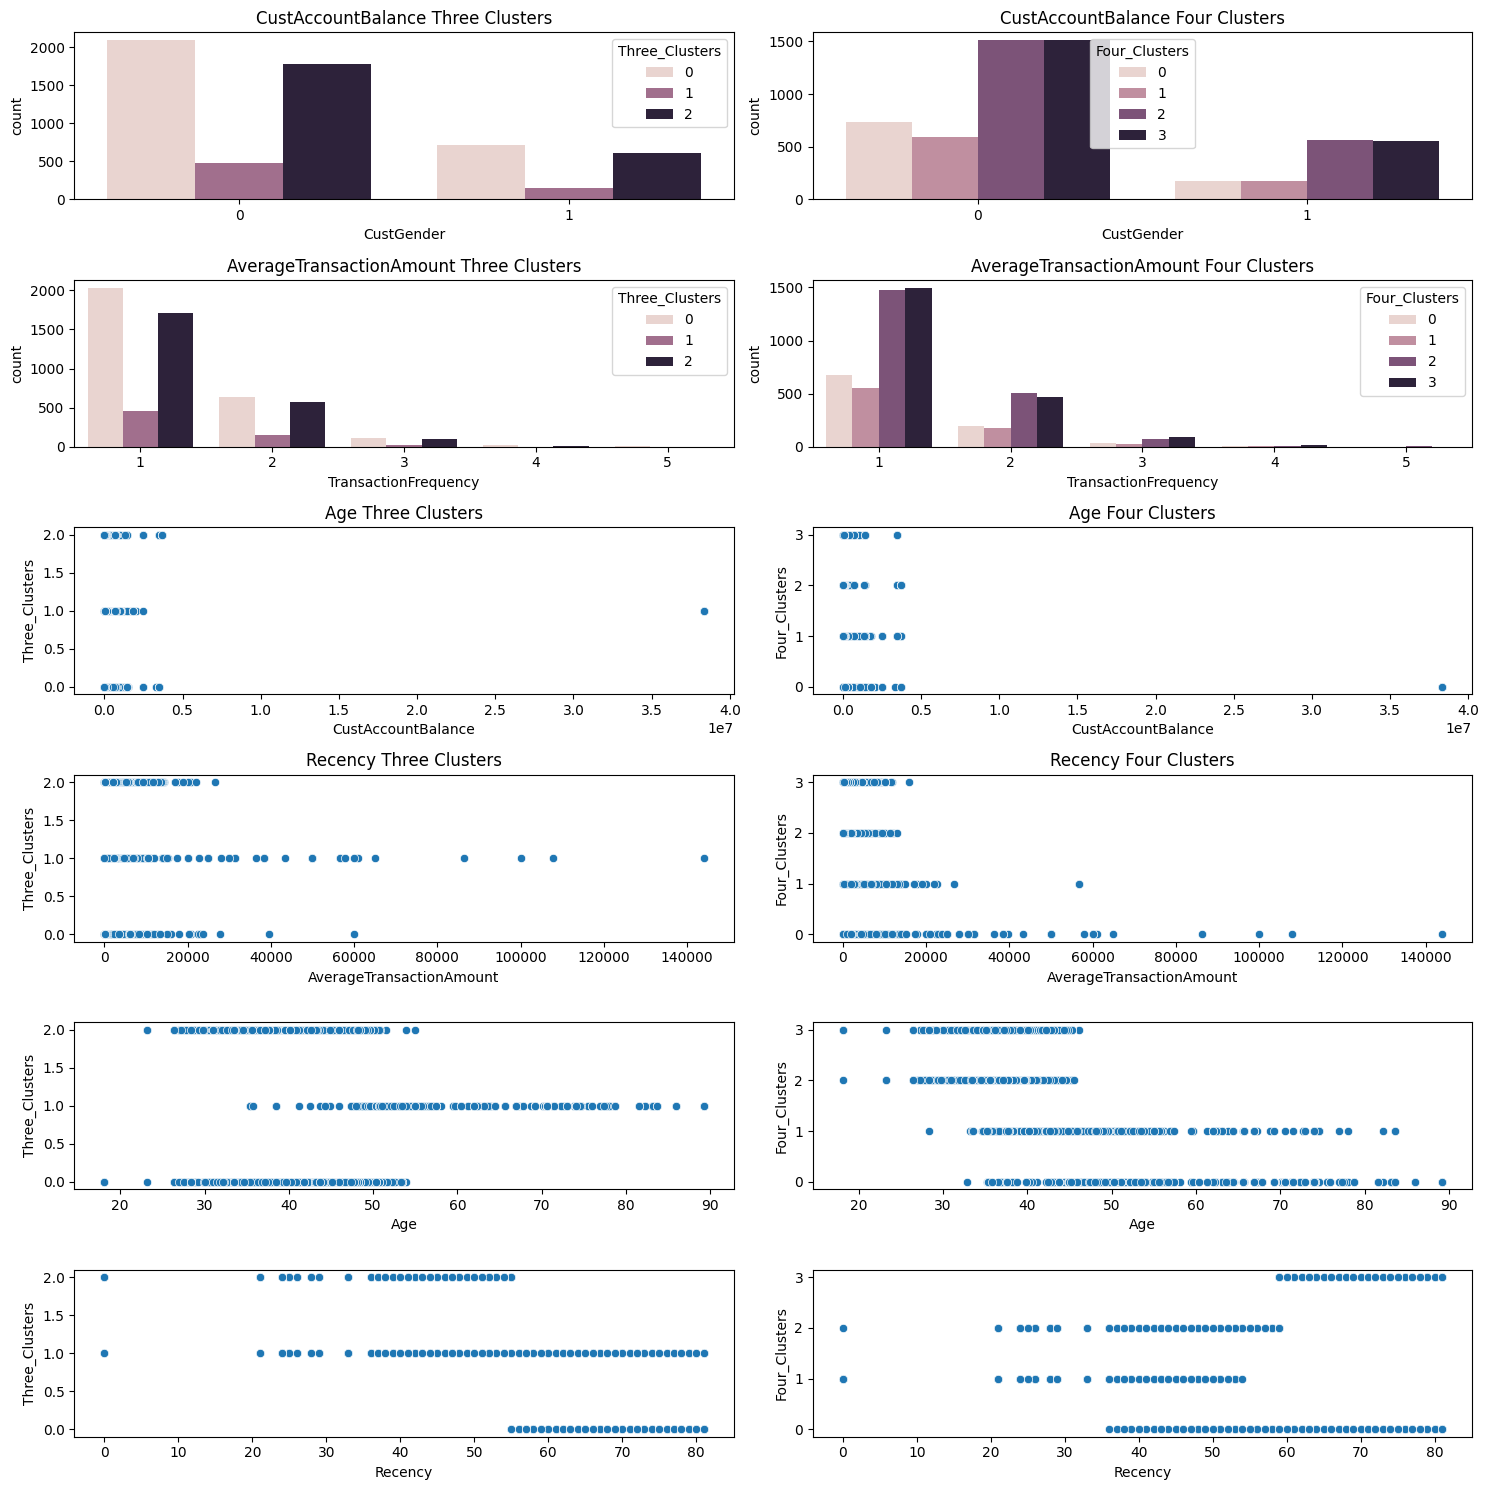

In [33]:
location_9['TransactionFrequency'] = location_9['TransactionFrequency'].astype(int)
fig, axes = plt.subplots(6, 2, figsize = (15, 15))
axes = axes.flatten()

continuous_columns = location_9.drop(columns = ['TransactionID_x','CustLocation', 'Three_Clusters',
                                                'Four_Clusters', 'CustGender', 'TransactionFrequency']).columns

cat_columns = location_9[['CustGender', 'TransactionFrequency']]

for idx, c_name in enumerate(cat_columns):
    sns.countplot(x = c_name, hue = 'Three_Clusters',  data = location_9, ax = axes[2 * idx])
    sns.countplot(x = c_name, hue = 'Four_Clusters', data = location_9, ax = axes[2 * idx + 1])
    axes[2 * idx].set_title(f'{c_name} Three Clusters')
    axes[2 * idx + 1].set_title(f'{c_name} Four Clusters')

for idx, c_name in enumerate(continuous_columns):
    sns.scatterplot(y = 'Three_Clusters', x = c_name,  data = location_9, ax = axes[2 * (idx + 2)])
    sns.scatterplot(y = 'Four_Clusters', x = c_name, data = location_9, ax = axes[2 * (idx + 2) + 1])
    axes[2 * idx].set_title(f'{c_name} Three Clusters')
    axes[2 * idx + 1].set_title(f'{c_name} Four Clusters')
    
plt.tight_layout()